In [0]:
!touch corona_india_data.json

In [0]:
import datetime
import json
import requests
import argparse
import logging
from bs4 import BeautifulSoup
from tabulate import tabulate

FORMAT = '[%(asctime)-15s] %(message)s'
logging.basicConfig(format=FORMAT, level=logging.DEBUG, filename='bot.log', filemode='a')

URL = 'https://www.mohfw.gov.in/'
SHORT_HEADERS = ['Sno', 'State','In','Fr','Cd','Dt']
FILE_NAME = 'corona_india_data.json'
extract_contents = lambda row: [x.text.replace('\n', '') for x in row]


def save(x):
    with open(FILE_NAME, 'w') as f:
        json.dump(x, f)


def load():
    res = {}
    with open(FILE_NAME, 'w+') as f:
        res = json.load(f)
    return res
    


interested_states = ["Andhra Pradesh","Arunachal Pradesh","Assam","Bihar","Chhattisgarh","Goa","Gujarat","Haryana","Himachal Pradesh","Jammu & Kashmir","Jharkhand","Karnataka","Kerala","Madhya Pradesh","Maharashtra","Manipur","Meghalaya","Mizoram","Nagaland","Odisha","Punjab","Rajasthan","Sikkim","Tamil Nadu","Telangana","Tripura","Uttarakhand","Uttar Pradesh","West Bengal","Andaman and Nicobar Islands","Chandigarh","The Government of NCT of Delhi","Dadra and Nagar Haveli","Daman and Diu","Lakshadweep","Puducherry"]

current_time = datetime.datetime.now().strftime('%d/%m/%Y %H:%M')
info = []

try:
    response = requests.get(URL).content
    soup = BeautifulSoup(response, 'html.parser')
    header = extract_contents(soup.tr.find_all('th'))
    print("__")
    stats = []
    all_rows = soup.find_all('tr')
    for row in all_rows:
        stat = extract_contents(row.find_all('td'))
        print(stat)
        if stat:
            if len(stat) == 5:
                # last row
                stat = ['', *stat]
                stats.append(stat)
            elif any([s.lower() in stat[1].lower() for s in interested_states]):
                stats.append(stat)
    cur_data = {x[1]: {current_time: x[2:]} for x in stats}
except Exception as e:
  print(e)

__
[]
[]
['23-03-2020', 'D.O. Letter from Cabinet Secretary to Chief Secretaries for management and containment of COVID-19 dated 23.03.2020 ']
['23-03-2020', 'Advisory on the use of Hydroxy-chloroquin as prophylaxis for SARS-CoV-2 infection ']
['22-03-2020', ' KIDS, VAAYU & CORONA : Comic book for children to provide correct information about COVID-19 - Part 2']
['22-03-2020', ' D.O. Letter from Cabinet Secretary to Chief Secretaries for management and containment of COVID-19 dated 22.03.2020']
['22-03-2020', 'Notification of ICMR guidelines for COVID-19 testing in private laboratories in India ']
['21-03-2020', ' Revised Guidelines/Strategy for COVID-19 testing by Indian Council of Medical Research (ICMR)']
[]
['1', 'Andhra Pradesh', '7', '0', '0', '0']
['2', 'Bihar', '2', '0', '0', '1']
['3', 'Chhattisgarh', '1', '0', '0', '0']
['4', 'Delhi', '28', '1', '5', '1']
['5', 'Gujarat', '29', '0', '0', '1']
['6', 'Haryana', '12', '14', '11', '0']
['7', 'Himachal Pradesh', '3', '0', '0', '1

In [0]:
#stats

In [0]:
#cur_data

In [0]:
#save(cur_data)

In [0]:
import pandas as pd

In [0]:
col = ["S_No"	,"NameofState"	,"Total_Confirmed_cases_(Indian_National)","Total_Confirmed_cases_(Foreign_National)","Cured_Discharged/Migrated",	"Death"]
df = pd.DataFrame(stats,columns=col)

In [0]:
df = df[:-1]
df.head()

,S_No,NameofState,Total_Confirmed_cases_(Indian_National),Total_Confirmed_cases_(Foreign_National),Cured_Discharged/Migrated,Death
0,1,Andhra Pradesh,7,0,0,0
1,2,Bihar,2,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,5,Gujarat,29,0,0,1
4,6,Haryana,12,14,11,0


In [0]:
df.drop(["S_No"],inplace=True,axis=1)
df

,NameofState,Total_Confirmed_cases_(Indian_National),Total_Confirmed_cases_(Foreign_National),Cured_Discharged/Migrated,Death
0,Andhra Pradesh,7,0,0,0
1,Bihar,2,0,0,1
2,Chhattisgarh,1,0,0,0
3,Gujarat,29,0,0,1
4,Haryana,12,14,11,0
5,Himachal Pradesh,3,0,0,1
6,Karnataka,33,0,2,1
7,Kerala,60,7,3,0
8,Madhya Pradesh,6,0,0,0
9,Maharashtra,71,3,0,2


In [0]:
df[["Total_Confirmed_cases_(Indian_National)","Total_Confirmed_cases_(Foreign_National)","Cured_Discharged/Migrated",	"Death"]] = df[["Total_Confirmed_cases_(Indian_National)","Total_Confirmed_cases_(Foreign_National)","Cured_Discharged/Migrated",	"Death"]].apply(pd.to_numeric)

In [0]:
df.to_csv("data.csv",index=False)

In [0]:
# importing packages
import pandas as pd
import numpy as np
#from scipy.interpolate import spline
from numpy import array
import matplotlib as mpl

# for plots
import matplotlib.pyplot as plt
from matplotlib import cm

# for date and time processing
import datetime

# for statistical graphs
import seaborn as sns

In [0]:
df.describe()

,Total_Confirmed_cases_(Indian_National),Total_Confirmed_cases_(Foreign_National),Cured_Discharged/Migrated,Death
count,19.000000,19.000000,19.000000,19.000000
mean,17.210526,1.526316,1.526316,0.421053
std,20.208851,3.485979,3.168744,0.606977
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,7.000000,0.000000,0.000000,0.000000
75%,27.500000,1.500000,1.500000,1.000000
max,71.000000,14.000000,11.000000,2.000000


<Figure size 1440x1440 with 0 Axes>

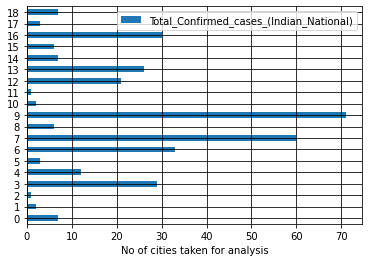

In [0]:
# A bar chart to show from which states, how many cities are taken for examination.
fig = plt.figure(figsize=(20,20))
df[["NameofState","Total_Confirmed_cases_(Indian_National)"]].plot(kind="barh", fontsize = 10)
plt.grid(b=True, which='both', color='Black')
plt.xlabel('No of cities taken for analysis')
plt.show ()

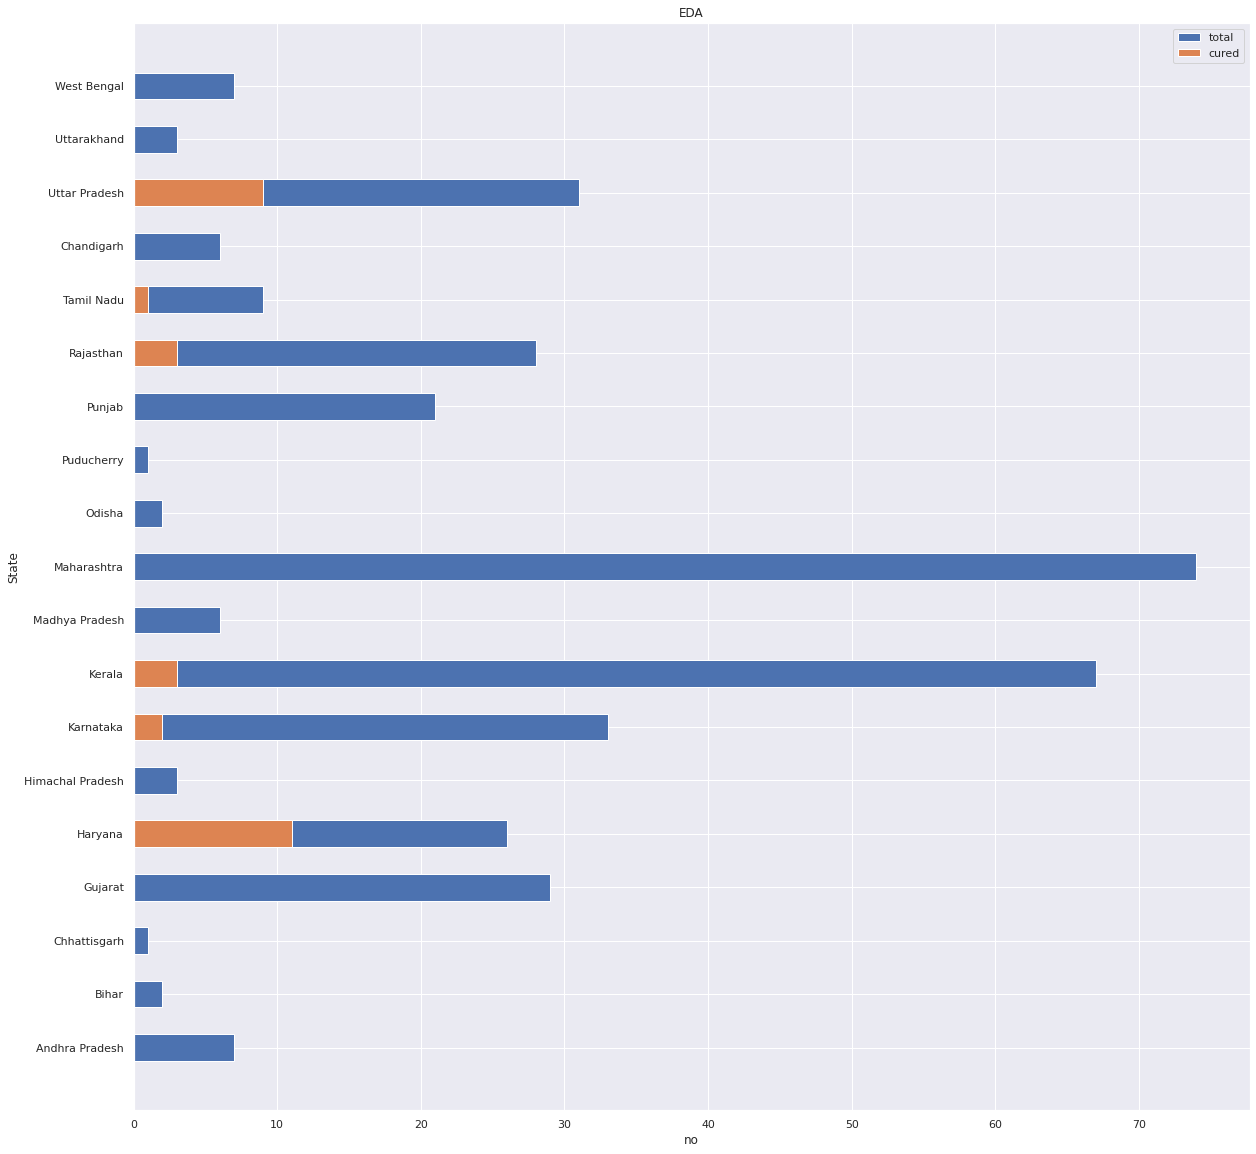

In [0]:
sns.set()
name = df["NameofState"]
count = df["Total_Confirmed_cases_(Indian_National)"]+ df["Total_Confirmed_cases_(Foreign_National)"]
fig = plt.figure(figsize=(20,20))
plt.title("EDA")
plt.barh(name,count,height=0.5,label="total")
plt.barh(name,df["Cured_Discharged/Migrated"],height=0.5,label="cured")
plt.ylabel("State")
plt.xlabel("no")
plt.legend()

In [0]:
df2 = pd.read_csv("long.txt")

In [0]:
df2.drop(["count"],inplace=True,axis=1)

In [0]:
df2.to_csv("long.csv",index=False)